<a href="https://colab.research.google.com/github/LoQiseaking69/Algo_Note_Books/blob/main/DEMO/Julia_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Julia Set Visualization Notebook

## Introduction

This Jupyter notebook is dedicated to the computation and visualization of Julia Sets. Julia Sets are complex fractals generated from iterative functions and are renowned for their strikingly intricate patterns. This notebook serves as an interactive tool to explore these fascinating constructs from the realm of complex dynamics and fractal geometry.

## Notebook Structure

- **CODE Cell 1**: Importing required libraries and setting up the environment.
- **CODE Cell 2**: Function to compute the Julia Set.
- **CODE Cell 3**: Function for plotting the Julia Set.
- **CODE Cell 4**: Interactive widgets for user input.
- **CODE Cell 5**: Event handling and display of the Julia Set.

## Dependencies

In [ ]:
%%capture
!pip install numpy
!pip install matplotlib
!pip install numba
!pip install ipywidgets

# Required Libraries and Setup
Import all necessary libraries for numerical computations, visualization, and interactive widgets. Also, set up the directory for caching, if required for performance optimization.

# imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, prange
from ipywidgets import Text, Label
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, prange
from ipywidgets import FloatSlider, IntSlider, interactive, VBox, HBox, Button, Output
from IPython.display import display
from IPython.display import Image

# Compute the Julia Set
Define the `compute_fractal_parallel` function to calculate the Julia Set for a given complex number. This function employs parallel computing for efficient processing.

In [6]:
# Numba-accelerated function for generating Julia set fractals
@jit(nopython=True, parallel=True)
def julia_set(width, height, x_min, x_max, y_min, y_max, c, max_iter):
    x = np.linspace(x_min, x_max, width)
    y = np.linspace(y_min, y_max, height)
    fractal = np.zeros((height, width), dtype=np.int64)

    for i in prange(height):
        for j in prange(width):
            zx = x[j]
            zy = y[i]
            iteration = 0
            while zx*zx + zy*zy < 4 and iteration < max_iter:
                new_zx = zx*zx - zy*zy + c.real
                zy = 2*zx*zy + c.imag
                zx = new_zx
                iteration += 1
            fractal[i, j] = iteration

    return fractal

# Function to plot and optionally save the Julia set
def plot_julia(fractal, save=False):
    plt.figure(figsize=(10, 10))
    plt.imshow(fractal.astype(float), cmap='hot')
    plt.colorbar()
    plt.title("Julia Set")
    if save:
        plt.savefig('julia_set.png')
    plt.show()

# Interactive function to generate and plot the Julia set
def interactive_plot(c_real, c_imag, x_min, x_max, y_min, y_max, max_iter, save=False):
    c = complex(c_real, c_imag)
    fractal = julia_set(800, 800, x_min, x_max, y_min, y_max, c, max_iter)
    plot_julia(fractal, save)

# Button click event handler
output = Output()
def on_save_button_clicked(b):
    with output:
        output.clear_output()
        interactive_plot(c_real.value, c_imag.value, x_min.value, x_max.value, y_min.value, y_max.value, max_iter.value, save=True)
        print("Fractal image saved as 'julia_set.png'")

# Define interactive widgets
c_real = FloatSlider(min=-2.0, max=2.0, step=0.01, value=-0.8, description='Re(c):')
c_imag = FloatSlider(min=-2.0, max=2.0, step=0.01, value=0.156, description='Im(c):')
x_min = FloatSlider(min=-2.0, max=2.0, step=0.01, value=-1.5, description='x_min:')
x_max = FloatSlider(min=-2.0, max=2.0, step=0.01, value=1.5, description='x_max:')
y_min = FloatSlider(min=-2.0, max=2.0, step=0.01, value=-1.5, description='y_min:')
y_max = FloatSlider(min=-2.0, max=2.0, step=0.01, value=1.5, description='y_max:')
max_iter = IntSlider(min=1, max=1000, step=1, value=300, description='Max Iter:')

# Create a button to save the fractal image
save_button = Button(description="Save Fractal Image")
save_button.on_click(on_save_button_clicked)

# Create interactive UI
interactive_ui = interactive(interactive_plot, c_real=c_real, c_imag=c_imag,
                             x_min=x_min, x_max=x_max, y_min=y_min, y_max=y_max, max_iter=max_iter)

# Display the UI
display(VBox([HBox([save_button]), interactive_ui, output]))

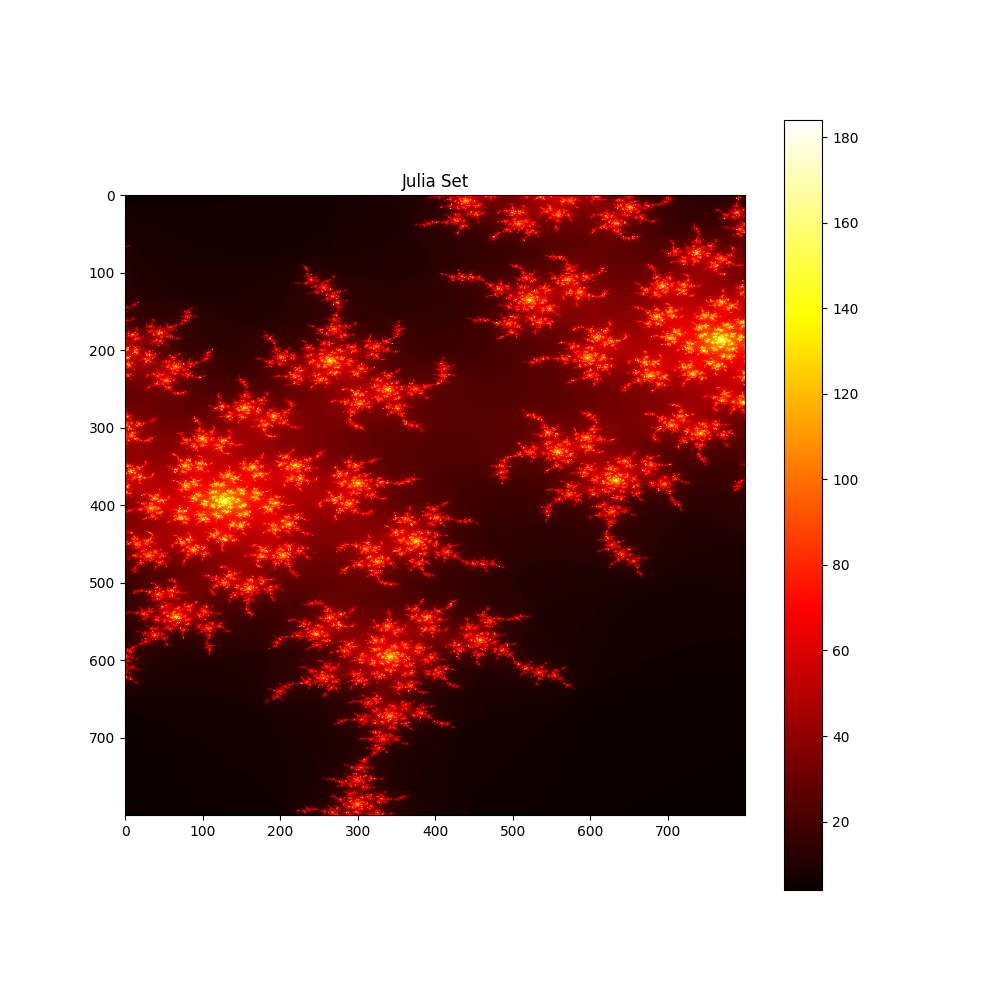

In [7]:
# Display the saved fractal image
display(Image(filename='/content/julia_set.png'))
